In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
nut=pd.read_csv(r"C:\Users\Asus\Desktop\Crop_Prediction_Using_Nutrients\ML\Nutrient_DL\Data_Prep\Nutrients_table.csv")

In [4]:
del nut['Unnamed: 0']

In [5]:
c_names=list(set(nut["Crop_Name"]))
c_names.sort()

In [28]:
num=nut.to_numpy()

In [32]:
for i in range(num.shape[0]):
    num[i][1]=c_names.index(num[i][1])

In [6]:
c_names

['Cotton',
 'Groudnut',
 'Maize',
 'Potato',
 'Rice',
 'Soyabeans',
 'Sugarcane',
 'Sunflower',
 'Wheat']

In [34]:
np.random.shuffle(num)

In [46]:
for i in range(num.shape[0]):
    z=np.zeros(9)
    z[num[i][1]]=1
    num[i][1]=z
    

In [59]:
x=[]
y=[]
for i in range(num.shape[0]):
    x.append(np.asarray([num[i][2],num[i][3],num[i][4]]))
    y.append(num[i][1])

In [60]:
x=np.asarray(x)
y=np.asarray(y)

In [64]:
x[i]

array([8.218, 8.317, 2.722])

In [79]:
x_train=x[0:1500]
y_train=y[0:1500]
x_test=x[1500:]
y_test=y[1500:]

In [74]:
x_test.shape

(300, 3)

In [75]:
x_train.shape

(1500, 3)

In [127]:
i=tf.keras.layers.Input(3)
dl1=tf.keras.layers.Dense(30,activation="relu")(i)
dl2=tf.keras.layers.Dense(60,activation="relu")(dl1)
dl3=tf.keras.layers.Dense(90,activation="relu")(dl2)
dl4=tf.keras.layers.Dense(45,activation="relu")(dl3)
dl5=tf.keras.layers.Dense(18,activation="relu")(dl4)
out=tf.keras.layers.Dense(9,activation="softmax")(dl5)

model=tf.keras.models.Model(inputs=i,outputs=out)

In [128]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_48 (Dense)             (None, 30)                120       
_________________________________________________________________
dense_49 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_50 (Dense)             (None, 90)                5490      
_________________________________________________________________
dense_51 (Dense)             (None, 45)                4095      
_________________________________________________________________
dense_52 (Dense)             (None, 18)                828       
_________________________________________________________________
dense_53 (Dense)             (None, 9)                 171 

In [129]:
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])

In [130]:
cb=[
    tf.keras.callbacks.ModelCheckpoint(filepath='models/nut_model.{epoch:02d}-{val_loss:.2f}.h5')
]

In [131]:
history=model.fit(x=x,y=y,batch_size=16,epochs=50,validation_split=0.1,callbacks=cb)

Train on 1620 samples, validate on 180 samples
Epoch 1/50
1620/1620 [==============================] - 1s 627us/sample - loss: 1.3048 - acc: 0.4994 - val_loss: 0.9060 - val_acc: 0.6389
Epoch 2/50
1620/1620 [==============================] - 0s 154us/sample - loss: 0.5572 - acc: 0.7951 - val_loss: 0.4026 - val_acc: 0.8333
Epoch 3/50
1620/1620 [==============================] - 0s 161us/sample - loss: 0.3369 - acc: 0.8463 - val_loss: 0.2674 - val_acc: 0.8778
Epoch 4/50
1620/1620 [==============================] - 0s 147us/sample - loss: 0.2883 - acc: 0.8574 - val_loss: 0.2326 - val_acc: 0.8778
Epoch 5/50
1620/1620 [==============================] - 0s 168us/sample - loss: 0.2672 - acc: 0.8660 - val_loss: 0.2656 - val_acc: 0.8667
Epoch 6/50
1620/1620 [==============================] - 0s 187us/sample - loss: 0.2423 - acc: 0.8728 - val_loss: 0.3173 - val_acc: 0.8167
Epoch 7/50
1620/1620 [==============================] - 0s 142us/sample - loss: 0.2167 - acc: 0.8827 - val_loss: 0.2482 - val

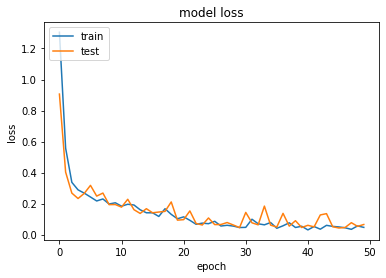

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss.jpg")

TypeError: 'History' object is not subscriptable

In [135]:
p=model.predict(x[1600:1605])

In [137]:
np.argmax(p[0])

8

In [138]:
x[1600]

array([14.656,  5.232,  0.367])

In [139]:
c_names[8]

'Wheat'